# Compare Mean Fluorescence Intensity of Gated Events

In [1]:
import os
import pandas as pd

import flowkit as fk

%matplotlib inline

## Load FlowJo Workspace

In [2]:
base_dir = "../../../data/8_color_data_set"

sample_path = os.path.join(base_dir, "fcs_files")
wsp_path = os.path.join(base_dir, "8_color_ICS.wsp")

In [3]:
workspace = fk.Workspace(wsp_path, fcs_samples=sample_path)

In [4]:
workspace.summary()

,samples,loaded_samples,gates,max_gate_depth
group_name,,,,
All Samples,3,3,14,6
DEN,3,3,14,6
GEN,0,0,0,0
G69,0,0,0,0
Lyo Cells,0,0,0,0


In [5]:
sample_ids = workspace.get_sample_ids('DEN')

In [6]:
sample_ids

['101_DEN084Y5_15_E01_008_clean.fcs',
 '101_DEN084Y5_15_E03_009_clean.fcs',
 '101_DEN084Y5_15_E05_010_clean.fcs']

In [7]:
# choose a sample ID
sample_id = '101_DEN084Y5_15_E03_009_clean.fcs'
sample = workspace.get_sample(sample_id)

## Review the gate hierachy

In [8]:
print(workspace.get_gate_hierarchy(sample_id, 'ascii'))

root
╰── Time
    ╰── Singlets
        ╰── aAmine-
            ╰── CD3+
                ├── CD4+
                │   ├── CD107a+
                │   ├── IFNg+
                │   ├── IL2+
                │   ╰── TNFa+
                ╰── CD8+
                    ├── CD107a+
                    ├── IFNg+
                    ├── IL2+
                    ╰── TNFa+


## Process gates for the sample group

In [9]:
workspace.analyze_samples(sample_id=sample_id)

## Get gated events for a sample

In [10]:
cd4_gate_name = 'CD4+'
cd4_events = workspace.get_gate_events(sample_id, cd4_gate_name)

In [11]:
sample.event_count, cd4_events.shape[0]

(283969, 81855)

In [12]:
cd4_events.head(5)

,sample_id,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,TNFa FITC FLR-A,CD8 PerCP-Cy55 FLR-A,IL2 BV421 FLR-A,Aqua Amine FLR-A,IFNg APC FLR-A,CD3 APC-H7 FLR-A,CD107a PE FLR-A,CD4 PE-Cy7 FLR-A,Time
1,101_DEN084Y5_15_E03_009_clean.fcs,0.484332,0.397831,0.304358,0.178974,0.165913,0.269681,0.242188,0.230791,0.282167,0.254901,0.244743,0.454572,0.276832,0.610560,0.029446
6,101_DEN084Y5_15_E03_009_clean.fcs,0.858325,0.713455,0.300763,0.160702,0.149963,0.267902,0.255704,0.297297,0.270034,0.259815,0.232809,0.383849,0.272156,0.476992,0.029638
7,101_DEN084Y5_15_E03_009_clean.fcs,0.499515,0.389256,0.320814,0.160819,0.148792,0.270207,0.542186,0.298411,0.430466,0.270496,0.720327,0.324062,0.353662,0.604535,0.029652
9,101_DEN084Y5_15_E03_009_clean.fcs,0.427556,0.346325,0.308638,0.181880,0.169140,0.268832,0.256053,0.305138,0.332638,0.251144,0.226288,0.607199,0.369072,0.423495,0.029680
16,101_DEN084Y5_15_E03_009_clean.fcs,0.527936,0.415756,0.317456,0.103247,0.096481,0.267532,0.241784,0.235227,0.283300,0.246906,0.251326,0.454224,0.306893,0.487684,0.029858


## Calculate means for channels of interest

In [13]:
fluoro_labels = []
for chan_idx in sample.fluoro_indices:
    fluoro_labels.append(sample.pnn_labels[chan_idx])

In [14]:
cd4_events = cd4_events[fluoro_labels]

In [15]:
cd4_mfi = cd4_events.mean()

In [16]:
cd4_mfi

TNFa FITC FLR-A         0.248338
CD8 PerCP-Cy55 FLR-A    0.274010
IL2 BV421 FLR-A         0.288348
Aqua Amine FLR-A        0.250962
IFNg APC FLR-A          0.246429
CD3 APC-H7 FLR-A        0.488177
CD107a PE FLR-A         0.279935
CD4 PE-Cy7 FLR-A        0.588879
dtype: float64

### Let's compare MFI between CD4+ & CD8+

In [17]:
cd8_gate_name = 'CD8+'
cd8_events = workspace.get_gate_events(sample_id, cd8_gate_name)

cd8_mfi = cd8_events[fluoro_labels].mean()

In [18]:
mfi_comp = pd.DataFrame([cd4_mfi, cd8_mfi], index=[cd4_gate_name, cd8_gate_name])

In [19]:
mfi_comp

,TNFa FITC FLR-A,CD8 PerCP-Cy55 FLR-A,IL2 BV421 FLR-A,Aqua Amine FLR-A,IFNg APC FLR-A,CD3 APC-H7 FLR-A,CD107a PE FLR-A,CD4 PE-Cy7 FLR-A
CD4+,0.248338,0.274010,0.288348,0.250962,0.246429,0.488177,0.279935,0.588879
CD8+,0.250975,0.584248,0.283504,0.251208,0.252061,0.459689,0.292997,0.308986


In [20]:
mfi_comp = mfi_comp.transpose()

In [21]:
mfi_comp

,CD4+,CD8+
TNFa FITC FLR-A,0.248338,0.250975
CD8 PerCP-Cy55 FLR-A,0.274010,0.584248
IL2 BV421 FLR-A,0.288348,0.283504
Aqua Amine FLR-A,0.250962,0.251208
IFNg APC FLR-A,0.246429,0.252061
CD3 APC-H7 FLR-A,0.488177,0.459689
CD107a PE FLR-A,0.279935,0.292997
CD4 PE-Cy7 FLR-A,0.588879,0.308986


[]

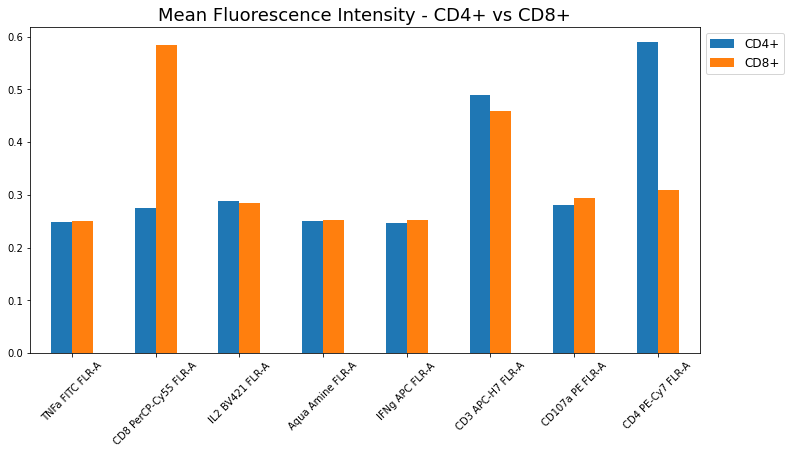

In [22]:
ax = mfi_comp.plot.bar(figsize=(12, 6))
ax.set_title("Mean Fluorescence Intensity - CD4+ vs CD8+", color='black', fontsize=18)
ax.legend(bbox_to_anchor=(1.0, 1.0), fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.plot()